In [1]:
import pandas as pd
# import numpy as np 

Classification problem

In [3]:
data = pd.read_csv('heart.csv')

Domain knowledge 

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# col = data.columns

In [7]:
data12 = data['target']
data12

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
X = data.iloc[0:,:-1]

In [11]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [12]:
col = X.columns.tolist()


In [13]:
y = data['target']

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
# for col in X:
#     plt.figure(figsize=(5,8))
#     sns.histplot(X[col],bins=30)
#     plt.show()

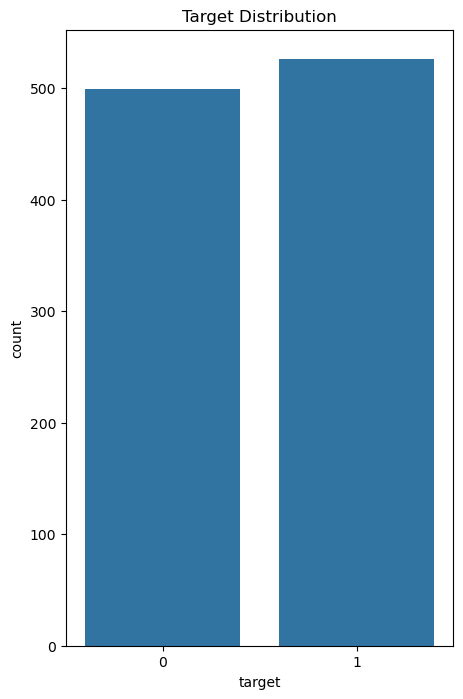

In [17]:
plt.figure(figsize=(5,8))
sns.countplot(x='target',data=data)
plt.title("Target Distribution")
plt.show()

In [18]:
# plt.figure(figsize=(10,20))
# sns.heatmap(data.corr(),annot=True)
# plt.show()

In [19]:
# for col in X:
#     plt.figure(figsize=(4,6))
#     sns.boxplot(x='target',y=col,data=data)
#     plt.show()

In [20]:
# plt.figure(figsize=(4,6))
# sns.pairplot(data = data , hue= 'target')
# plt.show()

In [21]:
# plt.figure(figsize=(4,6))
# sns.pairplot(data = X)
# plt.show()

In [22]:
from sklearn.model_selection import train_test_split #Method 

In [23]:
x_train , x_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Lr = LogisticRegression()

In [26]:
Lr.fit(x_train,y_train)

C:\Users\HII\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predicted_value=Lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy = accuracy_score(Lr.predict(x_test),y_test)

In [30]:
accuracy*100

78.53658536585367

In [31]:
from sklearn.svm import SVC
# from sklearn.svm import SVC

In [32]:
sv = SVC()

In [33]:
sv.fit(x_train,y_train)

SVC()

In [34]:
predicted_sv=sv.predict(x_test)

In [35]:
accuracy_sv = accuracy_score(predicted_sv,y_test)

In [36]:
accuracy_sv*100

68.29268292682927

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [38]:
Re = RandomForestClassifier()
# Gb = GradientBoostingClassifier()

In [39]:
Re.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
acuuracy_re = accuracy_score(Re.predict(x_test),y_test)

In [41]:
acuuracy_re*100

98.53658536585365

In [43]:
from imblearn.over_sampling import SMOTE

# Generate synthetic samples using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # generates synthetic samples for minority class
X_synthetic, y_synthetic = smote.fit_resample(X, y)

# take only 500 synthetic samples if needed
X_synthetic = X_synthetic.sample(500, random_state=42)
y_synthetic = y_synthetic.loc[X_synthetic.index]

# Evaluate model on synthetic data
y_pred = Re.predict(X_synthetic)

print("✅ Synthetic Data Validation using SMOTE")
print("Accuracy:", accuracy_score(y_synthetic, y_pred)*100)


✅ Synthetic Data Validation using SMOTE
Accuracy: 99.0


In [49]:
import pickle
# Save the trained model as .sav file
filename = 'saved_models/heart_disease_model.sav'

# Create the folder if not exist
import os
os.makedirs('saved_models', exist_ok=True)

# Write model to file
pickle.dump(Re , open(filename, 'wb'))
print("✅ Model saved successfully!")

✅ Model saved successfully!
